In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.options.display.max_columns = None #show all cols
pd.options.display.max_colwidth = -1 #show complete value in each cells

In [2]:
df=pd.read_csv('../clean_data/PHM2017/PHM2017.csv')

- train/val/test split fraction: 6:2:2
- use the f1 results from BiLSTM to draw

In [3]:
df.groupby(['symptom','label']).count().loc['alzheimer']['id'].apply(lambda x:int(x*0.6)).values

array([ 10, 511, 100,   4], dtype=int64)

In [4]:
print(df.groupby(['symptom']).count()['id'])
print('\nalzheimer\n',df.groupby(['symptom','label']).count().loc['alzheimer']['id'].apply(lambda x:int(x*0.6)).values)
print('\ncancer\n',df.groupby(['symptom','label']).count().loc['cancer']['id'].apply(lambda x:int(x*0.6)).values)
print('\ndepression\n',df.groupby(['symptom','label']).count().loc['depression']['id'].apply(lambda x:int(x*0.6)).values)
print('\nheart attack\n',df.groupby(['symptom','label']).count().loc['heart attack']['id'].apply(lambda x:int(x*0.6)).values)
print('\nparkinson\n',df.groupby(['symptom','label']).count().loc['parkinson']['id'].apply(lambda x:int(x*0.6)).values)
print('\nstroke\n',df.groupby(['symptom','label']).count().loc['stroke']['id'].apply(lambda x:int(x*0.6)).values)

symptom
alzheimer       1045
cancer          911 
depression      836 
heart attack    813 
parkinson       793 
stroke          890 
Name: id, dtype: int64

alzheimer
 [ 10 511 100   4]

cancer
 [ 73 361  95  16]

depression
 [ 60 248  16 175]

heart attack
 [329  91  47  19]

parkinson
 [109 318  39   8]

stroke
 [294 159  66  13]


In [7]:
alzheimer_f1={0:0.4,1:0.92,2:0.61,3:0}
cancer_f1={0:0.39 ,1:0.85 ,2:0.55 ,3:0.22}
depression_f1={0:0.40 ,1:0.65 ,2:0.0 ,3:0.60}
heart_attack_f1={0:0.83 ,1:0.86 ,2:0.47 ,3:0.18}
parkinson_f1={0:0.83 ,1:0.90 ,2:0.50 ,3:0.80}
stroke_f1={0:0.82 ,1:0.73 ,2:0.65 ,3:0.22}

all_f1s_dic=[alzheimer_f1,cancer_f1,depression_f1,heart_attack_f1,parkinson_f1,stroke_f1]
all_disease_lst=['alzheimer','cancer','depression','heart attack','parkinson','stroke']

In [8]:
disease_map_num_train_sample={}
for dis in all_disease_lst:
    print()
    disease_map_num_train_sample[dis]=df.groupby(['symptom','label']).count().loc[dis]['id'].apply(lambda x:int(x*0.6)).values

In [9]:
disease_map_num_train_sample

{'alzheimer': array([ 10, 511, 100,   4], dtype=int64),
 'cancer': array([ 73, 361,  95,  16], dtype=int64),
 'depression': array([ 60, 248,  16, 175], dtype=int64),
 'heart attack': array([329,  91,  47,  19], dtype=int64),
 'parkinson': array([109, 318,  39,   8], dtype=int64),
 'stroke': array([294, 159,  66,  13], dtype=int64)}

In [10]:
dataset
all_disease_lst=['Alzheimer','cancer','depression','heart attack','Parkinson','stroke']

NameError: name 'dataset' is not defined

In [11]:
from copy import deepcopy
data=[]

for i,dic in enumerate(all_f1s_dic):
    lst=[]
    for label in dic:
        lst=(dic[label],label,all_disease_lst[i],disease_map_num_train_sample[all_disease_lst[i]][label])
#         print(lst)
        data.append(lst)

In [12]:
dataset=pd.DataFrame(data=data,columns=['f1','label','disease','num_train_samples'])
dataset.head()

,f1,label,disease,num_train_samples
0,0.40,0,alzheimer,10
1,0.92,1,alzheimer,511
2,0.61,2,alzheimer,100
3,0.00,3,alzheimer,4
4,0.39,0,cancer,73


In [21]:
dataset.loc[dataset['disease']=='alzheimer','disease']='Alzheimer'
dataset.loc[dataset['disease']=='parkinson','disease']='Parkinson'

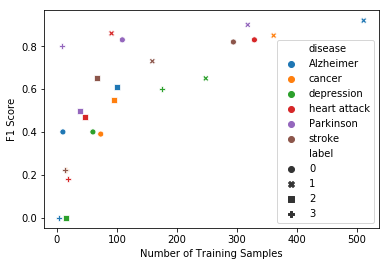

In [24]:
import matplotlib.pyplot as plt

ax=sns.scatterplot(x="num_train_samples", y="f1", 
#                 hue="label",
#                 style="disease",
                style="label",
                hue="disease",
                data=dataset)
ax.set(xlabel='Number of Training Samples', ylabel='F1 Score')
# ax.savefig('output.png')
plt.show()

## confusion matrix

In [26]:
data=np.array([[  0 ,  3 ,  1 ,  0],
 [  0, 162 ,  8 ,  1],
 [  0  ,13,  19 ,  1],
 [  0   ,0 ,  1 ,  0]]
)

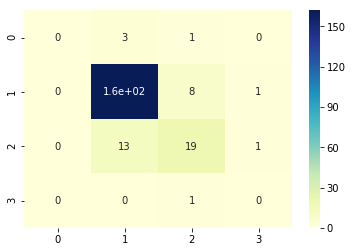

In [27]:
sns.heatmap(data=data, cmap="YlGnBu",annot=True)

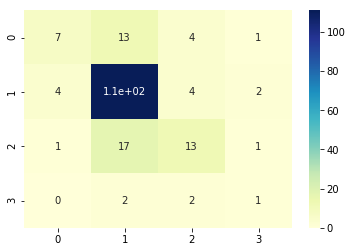

In [19]:
data=np.array([[  7 , 13 ,  4,   1],
 [  4, 111   ,4  , 2],
 [  1 , 17,  13  , 1],
 [  0   ,2  , 2 ,  1]]

)
sns.heatmap(data=data, cmap="YlGnBu",annot=True)

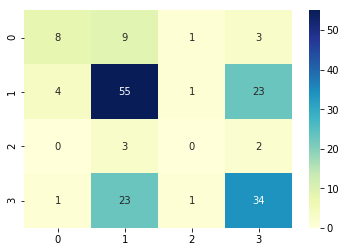

In [20]:
data=np.array([[ 8 , 9 , 1 , 3],
 [ 4 ,55  ,1 ,23],
 [ 0 , 3,  0 , 2],
 [ 1, 23,  1 ,34]]


)
sns.heatmap(data=data, cmap="YlGnBu",annot=True)

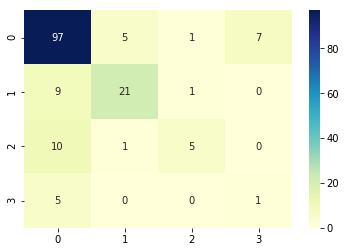

In [22]:
data=np.array([[97,  5,  1,  7],
 [ 9 ,21 , 1 , 0],
 [10  ,1 , 5,  0],
 [ 5  ,0 , 0 , 1]]


)
sns.heatmap(data=data, cmap="YlGnBu",annot=True)

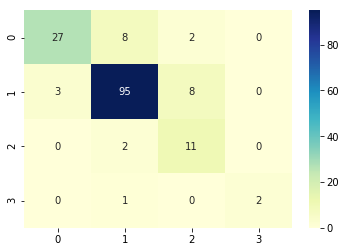

In [24]:
data=np.array([[27 , 8 , 2 , 0],
 [ 3 ,95 , 8 , 0],
 [ 0 , 2, 11 , 0],
 [ 0 , 1  ,0 , 2]]


)
sns.heatmap(data=data, cmap="YlGnBu",annot=True)

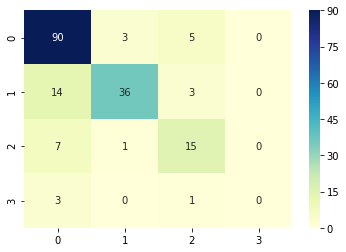

In [25]:
data=np.array([[90 , 3,  5 , 0],
 [14 ,36 , 3 , 0],
 [ 7  ,1 ,15 , 0],
 [ 3 , 0 , 1 , 0]]


)
sns.heatmap(data=data, cmap="YlGnBu",annot=True)